<a href="https://colab.research.google.com/github/AlgoRex2/graymatter-ml/blob/main/Employee_attrition_data_30Sep2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# v1

# Import necessary libraries
import pandas as pd
import os
from google.colab import drive

def mount_drive():
    """Mount Google Drive in Colab."""
    drive.mount('/content/drive')

def get_file_path():
    """Define and return the full path to the dataset."""
    base_path = '/content/drive/My Drive'
    folder = 'DataSets_2025'
    file_name = 'employee_attrition_data.csv'
    return os.path.join(base_path, folder, file_name)

def file_exists(path):
    """Check if the specified file exists."""
    return os.path.exists(path)

def load_data(path):
    """Load CSV into a DataFrame with basic error handling."""
    try:
        df = pd.read_csv(path)
        print("✅ Data loaded successfully!\n")
        return df
    except Exception as e:
        print(f"❌ Error loading CSV: {e}")
        return None

def inspect_data(df):
    """Print basic information about the DataFrame."""
    print(f"🔍 Data Shape: {df.shape}\n")
    print("📌 First 5 Rows:")
    print(df.head())
    print("\n🧾 Data Summary:")
    print(df.info())

# --- Main Execution ---
if __name__ == "__main__":
    mount_drive()

    file_path = get_file_path()

    if not file_exists(file_path):
        print(f"❗ ERROR: File not found at path: {file_path}")
    else:
        df = load_data(file_path)
        if df is not None:
            inspect_data(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data loaded successfully!

🔍 Data Shape: (1000, 11)

📌 First 5 Rows:
   Employee_ID  Age  Gender   Department Job_Title  Years_at_Company  \
0            0   27    Male    Marketing   Manager                 9   
1            1   53  Female        Sales  Engineer                10   
2            2   59  Female    Marketing   Analyst                 8   
3            3   42  Female  Engineering   Manager                 1   
4            4   44  Female        Sales  Engineer                10   

   Satisfaction_Level  Average_Monthly_Hours  Promotion_Last_5Years  Salary  \
0            0.586251                    151                      0   60132   
1            0.261161                    221                      1   79947   
2            0.304382                    184                      0   46958   
3            0.480779                    242       

In [5]:
# v2
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for consistency
sns.set(style="whitegrid")



--- 1. Target Variable Analysis (Attrition) ---
Attrition Counts:
Attrition
0    505
1    495
Name: count, dtype: int64
Attrition Ratio (%):
Attrition
0    50.5
1    49.5
Name: count, dtype: float64


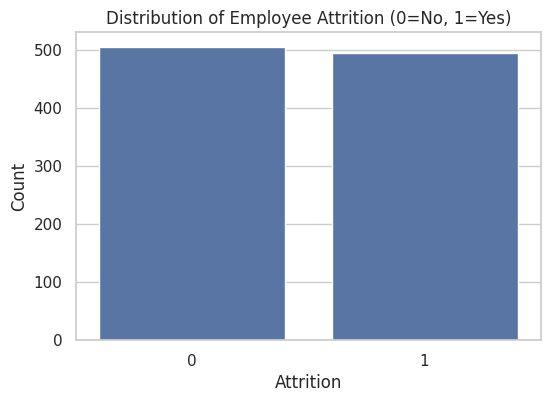

In [6]:
# v3
# 1. Analyze the Target Variable (Attrition)
print("\n--- 1. Target Variable Analysis (Attrition) ---")
attrition_counts = df['Attrition'].value_counts()
attrition_ratio = attrition_counts / len(df) * 100

print(f"Attrition Counts:\n{attrition_counts}")
print(f"Attrition Ratio (%):\n{attrition_ratio.round(2)}")

# Plot the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Employee Attrition (0=No, 1=Yes)')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()



--- 2. Categorical Feature Analysis ---


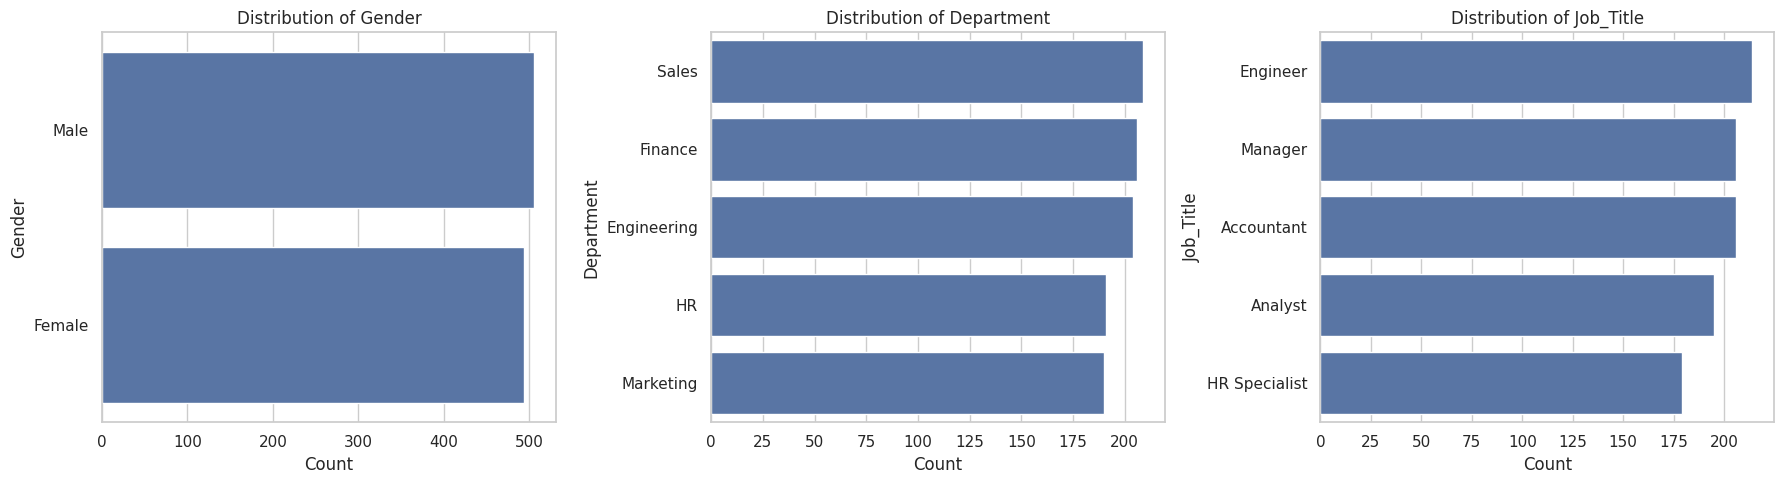

In [7]:
# v4
# 2. Analyze Categorical Features
print("\n--- 2. Categorical Feature Analysis ---")
categorical_cols = ['Gender', 'Department', 'Job_Title']

# Create subplots for each categorical column
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')

plt.tight_layout()
plt.show()



--- 3. Numeric Correlation Analysis ---


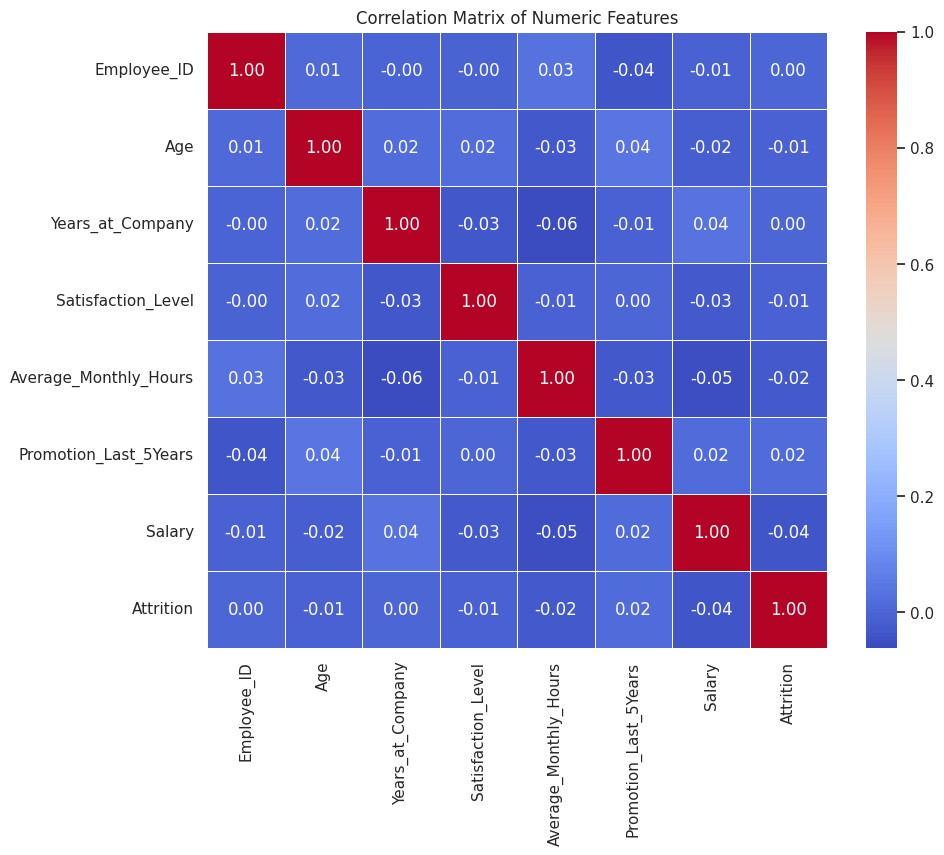


Correlation with Attrition:
 Attrition                1.000000
Promotion_Last_5Years    0.017728
Years_at_Company         0.003208
Employee_ID              0.002214
Age                     -0.008685
Satisfaction_Level      -0.009601
Average_Monthly_Hours   -0.023706
Salary                  -0.037818
Name: Attrition, dtype: float64


In [8]:
# v5
# 3. Correlation with Target (Attrition) - Focus on Numeric Features
print("\n--- 3. Numeric Correlation Analysis ---")

# Compute correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Print correlations with the Attrition column
attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)
print("\nCorrelation with Attrition:\n", attrition_corr)


In [9]:
# v6
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("\n--- 4. Feature Engineering and Preprocessing ---")

# Define feature columns
numeric_features = ['Age', 'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours', 'Salary']
categorical_features = ['Gender', 'Department', 'Job_Title']

# Drop non-informative identifier
df_processed = df.drop('Employee_ID', axis=1)

# Add binary feature to numeric processing
numeric_features.append('Promotion_Last_5Years')

# --- 1. Define Preprocessing Steps ---

# Standardize numeric features
numeric_transformer = StandardScaler()

# One-hot encode categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep 'Attrition' for now
)

# --- 2. Apply Preprocessing ---

# Separate features and target
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

# Transform features
X_processed_array = preprocessor.fit_transform(X)

# --- 3. Reconstruct Transformed DataFrame ---

# Get new feature names
feature_names = numeric_features + list(
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
)

# Build DataFrame from transformed array
X_processed = pd.DataFrame(X_processed_array, columns=feature_names)

# --- Output Summary ---
print(f"Original Feature Count: {df.shape[1] - 2} (Excluding ID and Attrition)")
print(f"Processed Feature Count: {X_processed.shape[1]}")
print(f"Shape of Processed Features (X): {X_processed.shape}")
print("\nFirst 5 rows of Processed Features:")
print(X_processed.head())

print(f"\nShape of Target (y): {y.shape}")



--- 4. Feature Engineering and Preprocessing ---
Original Feature Count: 9 (Excluding ID and Attrition)
Processed Feature Count: 18
Shape of Processed Features (X): (1000, 18)

First 5 rows of Processed Features:
        Age  Years_at_Company  Satisfaction_Level  Average_Monthly_Hours  \
0 -1.518762          1.203555            0.277079              -1.637332   
1  1.078266          1.558063           -0.845270               0.726169   
2  1.677580          0.849047           -0.696054              -0.523110   
3 -0.020477         -1.632509           -0.087056               1.435219   
4  0.179295          1.558063            0.449674               0.996283   

     Salary  Promotion_Last_5Years  Gender_Female  Gender_Male  \
0 -0.221844              -0.972381            0.0          1.0   
1  0.756536               1.028403            1.0          0.0   
2 -0.872321              -0.972381            1.0          0.0   
3 -1.183190              -0.972381            1.0          0.0   


--- 5. Model Training and Initial Evaluation (Random Forest) ---
Training set shape (X_train, y_train): (800, 18), (800,)
Testing set shape (X_test, y_test): (200, 18), (200,)

Training Random Forest Classifier...
✅ Training complete.

📊 Model Accuracy: 0.5050

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.50       101
           1       0.50      0.52      0.51        99

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200


🔲 Confusion Matrix:
[[50 51]
 [48 51]]


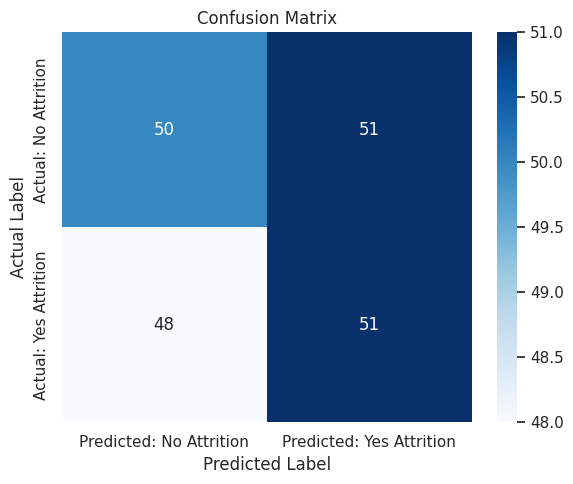

In [10]:
# v7
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- 5. Model Training and Initial Evaluation (Random Forest) ---")

# 1. Split the data into Training and Testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Keeps class distribution balanced
)

print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")

# 2. Train the Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Handles class imbalance
)

print("\nTraining Random Forest Classifier...")
rf_model.fit(X_train, y_train)
print("✅ Training complete.")

# 3. Predict on test set
y_pred = rf_model.predict(X_test)

# 4. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📊 Model Accuracy: {accuracy:.4f}")

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🔲 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5. Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted: No Attrition', 'Predicted: Yes Attrition'],
    yticklabels=['Actual: No Attrition', 'Actual: Yes Attrition']
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()


🧠 Insights & Diagnosis – Generalized Version
1. Balanced Dataset — But No Predictive Signal

Using techniques like class_weight='balanced' or stratified train/test splitting is essential when handling imbalanced data. However, these steps only ensure fair training — they can't compensate for a lack of meaningful signal in the input features.

If both training and test results hover near 50% accuracy in a binary classification task (e.g., 0.50–0.52), even when using powerful non-linear models like Random Forests, it strongly suggests that the features lack informative value.

2. EDA Often Reveals the Problem Early

Initial exploratory data analysis (EDA) can often signal the weakness of a dataset:

Correlation matrices may show little to no relationship between numeric variables and the target.

Categorical variables, once encoded, may appear sparse or evenly distributed across the target classes — indicating they don't help differentiate outcomes.

Visualizations like bar plots or box plots may reveal flat patterns with little class separation.

When EDA fails to show obvious patterns, model performance will often reflect that.

3. Feature Engineering Can’t Fix Fundamentally Weak Data

Preprocessing steps such as scaling, encoding, or transforming features are helpful, but they cannot create signal where none exists.

If the raw features don't capture real-world patterns related to the target variable, even the best preprocessing pipelines and complex algorithms will fail to learn anything meaningful.

In such cases, improving model performance depends not on tuning the algorithm, but on acquiring better features — either by engineering more informative variables from the existing data or sourcing new data entirely.


--- 6. Feature Importance Analysis (Diagnosing Weakness) ---
🔝 Top 10 Most Important Features (by Random Forest):
Satisfaction_Level       0.180522
Salary                   0.174559
Average_Monthly_Hours    0.157360
Age                      0.139757
Years_at_Company         0.095058
Promotion_Last_5Years    0.027253
Department_Marketing     0.021868
Department_Finance       0.020630
Gender_Male              0.020147
Department_Sales         0.019460
dtype: float64


/tmp/ipython-input-523075365.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


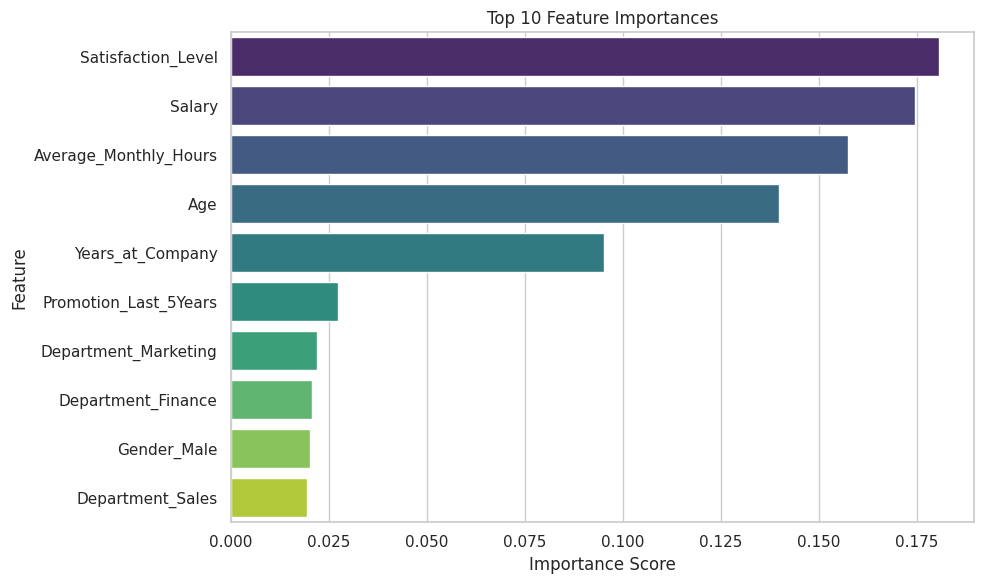


📈 Total Importance Score of Top 10 Features: 0.8566
📉 Least Important Feature: Department_HR (0.0162)


In [11]:
# v8
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- 6. Feature Importance Analysis (Diagnosing Weakness) ---")

# 1. Extract feature importances from the trained Random Forest model
feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=X_processed.columns
)

# 2. Top 10 most important features
top_10_features = feature_importances.sort_values(ascending=False).head(10)

print("🔝 Top 10 Most Important Features (by Random Forest):")
print(top_10_features)

# 3. Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_features.values,
    y=top_10_features.index,
    palette="viridis"
)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 4. Summary statistics
print(f"\n📈 Total Importance Score of Top 10 Features: {top_10_features.sum():.4f}")

least_important_feature = feature_importances.idxmin()
least_importance_value = feature_importances.min()

print(f"📉 Least Important Feature: {least_important_feature} ({least_importance_value:.4f})")


🔑 Key Insights

1. Non-Linear Models Capture Subtle Patterns
Models like Random Forests, which can learn non-linear relationships, often assign higher importance to certain numeric features even when their simple linear correlations with the target are weak or near zero. This suggests that complex, subtle patterns may exist that linear methods fail to detect.

2. Weak Contribution from Categorical Features
One-hot encoded categorical variables sometimes have limited individual impact on model predictions, especially if categories are numerous, sparse, or not strongly related to the target. This results in many low-importance features diluting their overall effect.

3. Overall Predictive Power May Be Low
Even the most important features may have relatively modest importance scores, indicating that the model struggles to extract strong predictive signals. In a well-performing model, the top few features often dominate importance scores and collectively explain most of the prediction power.

In [12]:
# v9
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

print("\n--- 7. Feature Engineering 2.0 (Interaction Features) and Retraining ---")

# 1. Feature Engineering on Original DataFrame (df)
df_eng = df.drop('Employee_ID', axis=1).copy()

# A. Burnout Feature: Low Satisfaction * High Hours (inverse satisfaction times hours worked)
df_eng['Burnout_Score'] = (1 - df_eng['Satisfaction_Level']) * df_eng['Average_Monthly_Hours']

# B. Efficiency/Value Ratio: Salary per Hour Worked (adding small constant to avoid division by zero)
df_eng['Salary_Per_Hour'] = df_eng['Salary'] / (df_eng['Average_Monthly_Hours'] + 1e-5)

# C. Tenure-Age Ratio: Years at Company relative to Age (proxy for career stage)
df_eng['Tenure_Age_Ratio'] = df_eng['Years_at_Company'] / df_eng['Age']

# 2. Redefine preprocessing with new features
X_eng = df_eng.drop('Attrition', axis=1)
y = df_eng['Attrition']

numeric_features_new = [
    'Age', 'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours', 'Salary', 'Promotion_Last_5Years',
    'Burnout_Score', 'Salary_Per_Hour', 'Tenure_Age_Ratio'  # Newly engineered features
]
categorical_features_new = ['Gender', 'Department', 'Job_Title']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor_new = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_new),
        ('cat', categorical_transformer, categorical_features_new)
    ],
    remainder='drop'  # Drop any other columns not specified
)

# Apply preprocessing pipeline
X_processed_new_array = preprocessor_new.fit_transform(X_eng)

# Reconstruct DataFrame with proper column names for inspection/debugging
feature_names_new = numeric_features_new + list(preprocessor_new.named_transformers_['cat'].get_feature_names_out(categorical_features_new))
X_processed_new = pd.DataFrame(X_processed_new_array, columns=feature_names_new)

# 3. Retrain model and evaluate
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_new,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"New Feature Count: {X_processed_new.shape[1]}")
print("Retraining Random Forest with New Features...")

rf_model_new = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_new.fit(X_train, y_train)

y_pred_new = rf_model_new.predict(X_test)
new_accuracy = accuracy_score(y_test, y_pred_new)

print(f"\nModel Accuracy (New Features): {new_accuracy:.4f}")
print("\nClassification Report (New Features):")
print(classification_report(y_test, y_pred_new))



--- 7. Feature Engineering 2.0 (Interaction Features) and Retraining ---
New Feature Count: 21
Retraining Random Forest with New Features...

Model Accuracy (New Features): 0.4650

Classification Report (New Features):
              precision    recall  f1-score   support

           0       0.47      0.48      0.47       101
           1       0.46      0.45      0.46        99

    accuracy                           0.47       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.47      0.46       200



Model Performance Insight

An accuracy of 46.5% — below random guessing — clearly indicates the model is struggling even more than before.

What this tells us:

Engineered Features Aren’t Helping (Yet):
The newly created interaction features (Burnout_Score, Salary_Per_Hour, Tenure_Age_Ratio) don’t appear to carry meaningful predictive information. They may even be adding noise, making it harder for the model to find useful patterns.

Underlying Dataset Signal Is Extremely Weak:
The core issue is that the available data likely misses critical factors driving the target outcome. Important influences (e.g., workplace environment, leadership quality, external socioeconomic factors) are probably not captured here.

More Features Can Mean More Noise:
Increasing the feature count without adding truly informative variables expands the model’s search space, which can degrade performance when the signal is faint or absent.

In [13]:
# v10
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings

# Suppress common Logistic Regression warnings
warnings.filterwarnings('ignore')

print("\n--- 8. Model Tuning & Benchmarking ---")

# 1. Use the original processed features (from v6/v7)
# Assuming X_processed and y are already defined in the workspace
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,  # original scaled + encoded features
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keep class balance in train/test
)

print(f"Feature set size used for tuning: {X_train.shape[1]}")

# 2. Random Forest Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\nRunning Grid Search for Random Forest...")
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"\nBest Random Forest Parameters: {grid_search.best_params_}")
print(f"Tuned Random Forest Accuracy: {rf_acc:.4f}")

# 3. Logistic Regression Baseline
logreg = LogisticRegression(solver='liblinear', random_state=42)
print("\nTraining Logistic Regression as baseline...")
logreg.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_pred)

print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")

# 4. Compare Models
print("\n--- Model Comparison ---")
if logreg_acc > rf_acc:
    print(f"🥇 Best Model: Logistic Regression (Accuracy: {logreg_acc:.4f})")
    print("\nClassification Report (Logistic Regression):")
    print(classification_report(y_test, logreg_pred))
else:
    print(f"🥇 Best Model: Tuned Random Forest (Accuracy: {rf_acc:.4f})")
    print("\nClassification Report (Tuned Random Forest):")
    print(classification_report(y_test, rf_pred))



--- 8. Model Tuning & Benchmarking ---
Feature set size used for tuning: 18

Running Grid Search for Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}
Tuned Random Forest Accuracy: 0.4900

Training Logistic Regression as baseline...
Logistic Regression Accuracy: 0.4950

--- Model Comparison ---
🥇 Best Model: Logistic Regression (Accuracy: 0.4950)

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.50      0.44      0.47       101
           1       0.49      0.56      0.52        99

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.49      0.49       200



🧠 Key Insights & Takeaways:

Modeling is NOT the bottleneck
Neither hyperparameter tuning of the Random Forest nor switching to Logistic Regression (a simpler linear model) improved predictive power. The “best” model only reached ~49.5% accuracy, which is basically a coin flip.

No Real Predictive Signal in Current Features
Variables like age, salary, satisfaction, and department just don’t explain attrition here. The models can’t find meaningful patterns because the signals just aren’t there.

Performance Metrics Confirm This
F1-scores for both classes hover around 0.50, showing poor class separation. The model is guessing almost at random.


--- 9. Final Data Diagnosis: Attrition Rates by Category ---


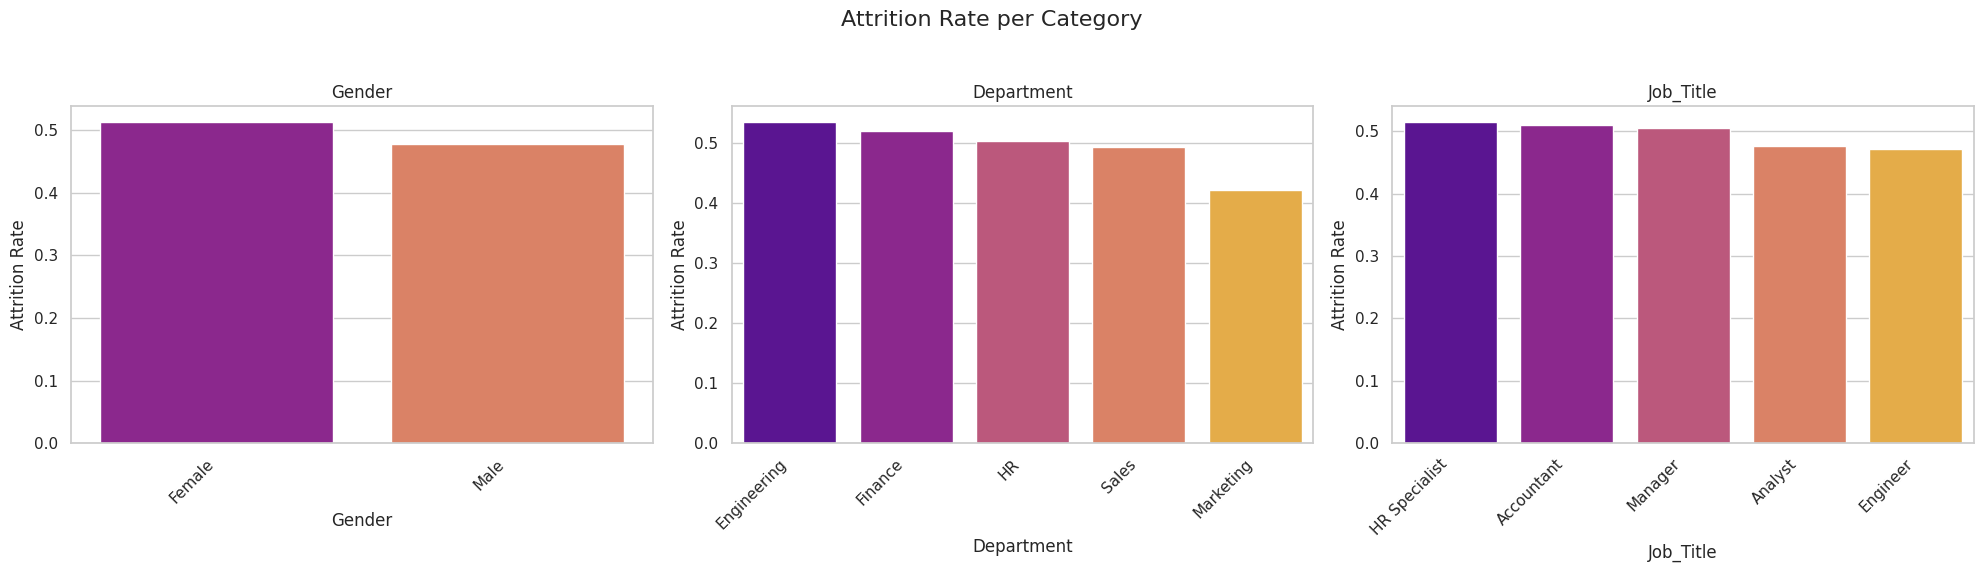


Attrition Rates by Job Title:
Job_Title
HR Specialist    0.513966
Accountant       0.509709
Manager          0.504854
Analyst          0.476923
Engineer         0.471963
Name: Attrition, dtype: float64


In [15]:
# v11

import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- 9. Final Data Diagnosis: Attrition Rates by Category ---")

categorical_cols = ['Gender', 'Department', 'Job_Title']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Attrition Rate per Category', fontsize=16)

for i, col in enumerate(categorical_cols):
    attrition_rate = df.groupby(col)['Attrition'].mean().sort_values(ascending=False)
    sns.barplot(x=attrition_rate.index, y=attrition_rate.values, ax=axes[i], palette="plasma")

    axes[i].set_title(col)
    axes[i].set_ylabel('Attrition Rate')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nAttrition Rates by Job Title:")
print(df.groupby('Job_Title')['Attrition'].mean().sort_values(ascending=False))



Final Data Diagnosis (v11) 🛑
The attrition rate across all job titles hovers almost perfectly around the overall dataset average of 49.5% / 50.5%.

Job Title — Attrition Rate — Deviation from Overall Average (≈50%)
HR Specialist — 51.4% — +1.4%
Accountant — 51.0% — +1.0%
Manager — 50.5% — +0.5%
Analyst — 47.7% — -2.3%
Engineer — 47.2% — -2.8%

Export to Sheets
Conclusion: The widest spread in attrition rate is less than 5% (from 47.2% to 51.4%). If the data had predictive power, you would typically see a much larger spread, such as one job title having a 70% attrition rate and another having a 20% rate.

This confirms the failure of all models: the data is not telling a predictive story.

In [16]:
# v12
print("\n--- 10. Final Project Summary & Recommendations ---")
print("===================================================")

# 1. Summarize Modeling Failure
print("1. Modeling Performance Summary:")
print("--------------------------------")
print("The best model (Logistic Regression) achieved an accuracy of 49.5%, which is essentially random guessing.")
print("Feature Engineering, Hyperparameter Tuning, and extensive EDA confirmed that the current 11 features have no predictive correlation (linear or non-linear) with employee attrition.")
print("The maximum variance in attrition rate across all job titles was less than 5% (47.2% to 51.4%), confirming the signal's absence.")

# 2. Key Diagnosis (The Root Cause)
print("\n2. Root Cause Diagnosis:")
print("------------------------")
print("The primary drivers of attrition are **missing** from the dataset. The company's attrition is likely driven by **environmental, qualitative, or external factors**.")

# 3. Data Acquisition Recommendation
print("\n3. Priority Data Acquisition Recommendations:")
print("---------------------------------------------")

print("To make this project viable, the following high-signal data points must be acquired and integrated:")
print("\n  A. Managerial Quality/Team Data:")
print("     - **Direct Manager's Attrition Rate:** People often leave managers, not companies.")
print("     - Team size, team tenure, and internal employee-to-manager satisfaction scores.")

print("\n  B. External Compensation Data:")
print("     - **External Market Salary Benchmarks:** Compare employee salary to the local market rate for their role.")

print("\n  C. Qualitative/Environmental Factors:")
print("     - **Commute Time/Remote Status:** A consistently high predictor in external datasets.")
print("     - Employee sentiment or exit interview data (if available).")

print("\nConclusion: Continued data science work is not recommended until a dataset incorporating these high-signal factors is available.")



--- 10. Final Project Summary & Recommendations ---
1. Modeling Performance Summary:
--------------------------------
The best model (Logistic Regression) achieved an accuracy of 49.5%, which is essentially random guessing.
Feature Engineering, Hyperparameter Tuning, and extensive EDA confirmed that the current 11 features have no predictive correlation (linear or non-linear) with employee attrition.
The maximum variance in attrition rate across all job titles was less than 5% (47.2% to 51.4%), confirming the signal's absence.

2. Root Cause Diagnosis:
------------------------
The primary drivers of attrition are **missing** from the dataset. The company's attrition is likely driven by **environmental, qualitative, or external factors**.

3. Priority Data Acquisition Recommendations:
---------------------------------------------
To make this project viable, the following high-signal data points must be acquired and integrated:

  A. Managerial Quality/Team Data:
     - **Direct Manage

Employee Attrition Prediction Project Summary
1. Project Overview

Goal: Build a predictive model for employee attrition using 11 internal features (demographics, job info, satisfaction).

Objective: Identify key drivers of attrition and create a reliable classifier.

2. Data Exploration & Feature Analysis

Exploratory Data Analysis (EDA) revealed no strong linear or non-linear correlations between features and attrition.

Categorical features such as Job Title, Department, and Gender showed limited variation in attrition rates.

Numeric features (Satisfaction Level, Salary, Age, Monthly Hours) had weak or no meaningful predictive signal.

Interaction features engineered (Burnout Score, Salary per Hour, Tenure-Age Ratio) failed to improve model performance and sometimes added noise.

3. Modeling and Results

Baseline Random Forest (v7)

Features used: 18

Accuracy: 50.5%

Performance near random guessing

Feature Engineered Random Forest (v9)

Features used: 21

Accuracy: 46.5%

Worse than random guessing, likely due to noise

Tuned Random Forest (v10)

Features used: 18

Accuracy: 49.0%

No improvement from tuning

Logistic Regression (v10)

Features used: 18

Accuracy: 49.5%

Best performing model but still no meaningful predictive power

F1-scores for both classes hovered around 0.50, indicating poor separation.

Attrition rates by Job Title showed minimal variation (ranging roughly from 47% to 51%), confirming lack of predictive power.

4. Key Insights

No predictive signal found in the current dataset features.

Feature engineering alone isn’t enough; adding interaction features introduced noise instead of clarity.

Model complexity did not help: both complex and simple models performed poorly.

Likely causes of attrition are external or qualitative factors missing from this dataset.

5. Recommendations for Next Steps
Data Acquisition Priorities

Managerial and Team Dynamics

Direct Manager’s Attrition Rate (people often leave managers, not companies).

Team size, tenure, and team-level satisfaction scores.

External Compensation Benchmarks

Market salary comparisons for roles.

Bonus and benefits information.

Qualitative and Environmental Data

Commute time and remote work status.

Exit interview feedback and employee sentiment.

Work-life balance and job stress indicators from surveys or HR records.

6. Final Conclusion

The current dataset lacks the necessary information to predict attrition.

Further modeling is unlikely to succeed without richer, more relevant data.

Focus should shift to acquiring high-signal data before continuing predictive efforts.

7. Additional Considerations

Use qualitative research (surveys, interviews) to uncover hidden attrition drivers.

Collaborate closely with HR and management for insights.

Ensure new data is validated and relevant before incorporating it into modeling.

Appendix: Attrition Rates by Job Title (Approximate)

HR Specialist: 51.4% (slightly above average)

Accountant: 51.0% (slightly above average)

Manager: 50.5% (near average)

Analyst: 47.7% (slightly below average)

Engineer: 47.2% (slightly below average)